# Grid construction

We explore he three different approaches for constructing a grid in a state space. 
1. Equidistant grid
1. Random grid
1. Chebyshev nodes

Chebyshev nodes have the advantage of covering the extremeties of the state space, which can be useful if these regions are highly non-linear. Reasons for this non-linearity could be different types of constraints, such as borrowing constraints or budget constraints. 



## Construction of an equidistant grid

In [93]:
# Construction of the grid: equidistant
dXss = 5.55;                                # Node around which the grid is constructed
iGridPoints = 10;                           # Number of gridpoints in the state space
dXmin = dXss * 0.8;                         # lower bound of the state space
dXmax = dXss * 1.2;                         # upper bound of the state space
iStepX = (dXmax-dXmin) / (iGridPoints-1);   # calculation of the steps taken between the grid points
vX = collect(dXmin:iStepX:dXmax);           # Construction of array that contains grid points
#display(vX)                                  

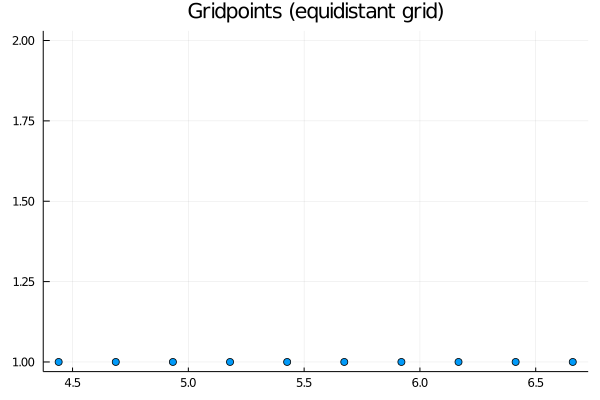

In [94]:
# Plot the random grid points
using Plots
scatter(vX, ones(iGridPoints,1), title = "Gridpoints (equidistant grid)", legend = false)

## Construction of random grid

In [95]:
# Construction of the grid: random
using Random, Distributions                 # Load packages required for random draws
iN = 1;                                     # Number of draws of 'iGridPoints' points
dXss = 5.55;                                # Node around which the grid is constructed
iGridPoints = 10;                            # Number of gridpoints in the state space
dXmin = dXss * 0.8;                         # lower bound of the state space
dXmax = dXss * 1.2;                         # upper bound of the state space
vXtemp = rand(Uniform(dXmin,dXmax),iGridPoints,iN) # random draws
vX = sort!(vXtemp, dims=1);                 # sort the random draws in ascending order
#display(vX)

### Vizualize how well the random grid covers the state space

In [96]:
# Check how many iterations it will take to cover a large part of the state space (limited to 2 decimals)
for i=1:iGridPoints
    for j=1:iN
        vX[i,j] = round(vX[i,j], digits=2); # round the values to 2-digits (will be used later!TBD)
    end
end
vDiff = vX[iGridPoints,:]-vX[1,:];          # Compute the distance between the upper and lower bound of the state space
#display(vDiff)

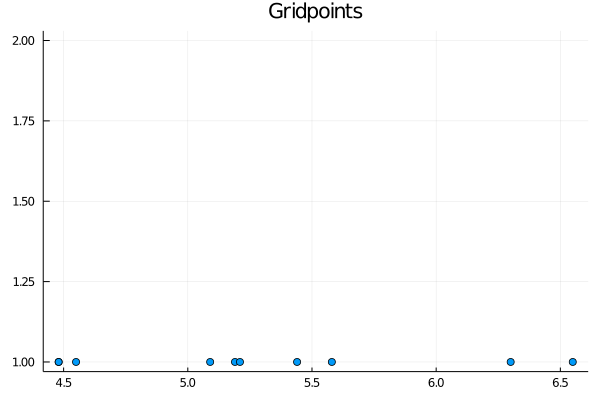

In [97]:
# Plot the random grid points
using Plots
scatter(vX, ones(iGridPoints,1), title = "Gridpoints", legend = false)

## Construction of Chebyshev nodes

In [98]:
function fun_chebyshev_nodes(a,b,m)
    
    ############################### 
    #   a: lower bound            #
    #   b: upper bound            #
    #   m: number of nodes        #
    #   Luxembourg (2020) - TSO   #
    ###############################
    
    vZ = zeros(m,1);
    vX = vZ;

    for k = 1:m
        vZ[k,1] = -cos( ((2*k)-1)/(2*m) * pi );    
        vX[k,1] = (vZ[k]+1)*( (b-a)/2 ) + a;
    end
    
    return vX;
    
end

fun_chebyshev_nodes (generic function with 1 method)

### Vizualize how well the Chebyshev nodes cover the state space

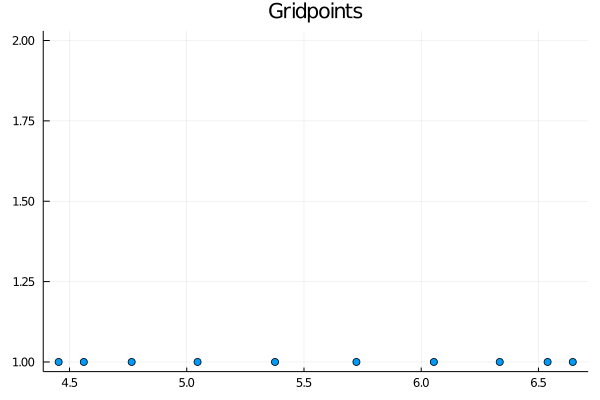

In [99]:
# Plot the random grid points
using Plots
dXss = 5.55;                                # Node around which the grid is constructed
iGridPoints = 10;                            # Number of gridpoints in the state space
dXmin = dXss * 0.8;                         # lower bound of the state space
dXmax = dXss * 1.2; 
vX = fun_chebyshev_nodes(dXmin,dXmax,iGridPoints);
scatter(vX, ones(iGridPoints,1), title = "Gridpoints", legend = false)